# ModelS_SGDOptimizer_Executado.ipynb-1

O código abaixo é responsável por definir os caminhos para as pastas de treino, validação e teste. Estas pastas contêm os dados que serão utilizados para treinar, validar e testar o modelo, respetivamente.


In [1]:
import os, shutil
train_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/train'
validation_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/validation'
test_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/test'

# ModelS_SGDOptimizer_Executado.ipynb-2

Este bloco de código é utilizado para carregar os conjuntos de dados de treino, validação e teste a partir das pastas especificadas. Utiliza-se a função "image_dataset_from_directory" da biblioteca Keras para este fim. Os parâmetros importantes incluem o caminho da pasta onde as imagens estão armazenadas, o tamanho das imagens (150x150 neste caso) e o tamanho do lote (batch size) para o carregamento dos dados, definido como 32.


In [2]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 150
train_dataset = image_dataset_from_directory(
train_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
validation_dataset = image_dataset_from_directory(
validation_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
test_dataset = image_dataset_from_directory(
test_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)

Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


# ModelS_SGDOptimizer_Executado.ipynb-3

Este código demonstra a construção de um modelo de rede neuronais convolucional (CNN) utilizando a biblioteca Keras do TensorFlow. O modelo é projetado para classificar imagens em 10 categorias diferentes.

Primeiro importam-se os módulos "keras" da biblioteca TensorFlow, bem como "layers", "models" e "image" do Keras. Estes módulos fornecem as ferramentas necessárias para construir e manipular modelos de redes neurais.

A função "keras.Input" é utilizada para definir a forma da entrada do modelo. Neste caso, espera-se imagens de tamanho "(IMG_SIZE, IMG_SIZE, 3)", onde "IMG_SIZE" é a altura e largura da imagem, e "3" representa os canais de cor RGB.

Pré-processamento e Camadas Convolucionais:
   Rescaling: A primeira camada é uma camada de reescalonamento que normaliza os valores dos pixels das imagens para o intervalo [0, 1].
   Convolucionais e Pooling: Seguem-se três blocos de camadas convolucionais, cada um composto por uma camada convolucional ("Conv2D") com ativação ReLU, uma camada de normalização em lote ("BatchNormalization") e uma camada de pooling máximo ("MaxPooling2D"). Estas camadas são responsáveis por extrair características das imagens.

Flatten e Densa:
   Flatten: A camada "Flatten" transforma os mapas de características 3D em vetores 1D, permitindo que sejam conectados a camadas densas.
   Dropout: Uma camada de "Dropout" é aplicada para reduzir o overfitting, descartando aleatoriamente uma fração das unidades de entrada durante o treino.
   Densa: Segue-se uma camada densa ("Dense") com 512 unidades e ativação ReLU.

Camada de Saída: A última camada é uma camada densa com 10 unidades (uma para cada categoria de classificação) e ativação "softmax", que é usada para a classificação multiclasse.

Compilação do Modelo: Finalmente, o modelo é compilado, ligando as entradas às saídas definidas.

In [3]:
from tensorflow import keras
from keras import layers
from keras import models
from keras.preprocessing import image

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# ModelS_SGDOptimizer_Executado.ipynb-4
Aqui, o modelo é compilado com o otimizador SGD, a função de perda "sparse_categorical_crossentropy" para classificação multiclasse e a métrica de "accuracy" para avaliar o desempenho.

ReduceLROnPlateau reduz a taxa de aprendizagem quando uma métrica parou de melhorar. Isso ajuda a refinar os pesos do modelo quando se aproxima de um mínimo local durante o treino.

O callback EarlyStopping interrompe o treino se o "val_loss" não melhorar após um determinado número de épocas ("patience"). Isso previne o overfitting e economiza tempo de treino.

Este callback ModelCheckpoint salva o modelo após cada época, mas apenas se o "val_loss" melhorar. Isso é útil para retomar o treino de onde parou e evitar a perda de um modelo bem treinado devido a uma interrupção inesperada.

Finalmente, o modelo é treinado utilizando os conjuntos de dados de treino e validação, com um número máximo de 30 épocas. Os callbacks definidos anteriormente são passados para o método fit para otimizar o processo de treino.

In [4]:
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.001
)

In [6]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [7]:
from keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    filepath='C:/Users/flavi/Desktop/projetoClassificaoDeImagens/dl_project_2201707_2211044/ModelosS/ModelS_SGDOptimizer.keras',
    save_best_only=True,
    monitor='val_loss'
)

In [8]:
callbacks = [reduce_lr, early_stopping, model_checkpoint]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1092s 869ms/step - accuracy: 0.4040 - loss: 1.9449 - val_accuracy: 0.5251 - val_loss: 1.3241 - learning_rate: 0.0100
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1091s 873ms/step - accuracy: 0.5952 - loss: 1.1380 - val_accuracy: 0.6099 - val_loss: 1.1089 - learning_rate: 0.0100
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1131s 905ms/step - accuracy: 0.6770 - loss: 0.9113 - val_accuracy: 0.6040 - val_loss: 1.1744 - learning_rate: 0.0100
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1199s 933ms/step - accuracy: 0.7436 - loss: 0.7177 - val_accuracy: 0.6360 - val_loss: 1.0946 - learning_rate: 0.0100
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1165s 932ms/step - accuracy: 0.8082 - loss: 0.5436 - val_accuracy: 0.6662 - val_loss: 1.0878 - learning_rate: 0.0100
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1149s 919ms/step - accuracy: 0.8600 - loss: 0.3930 - val_accuracy: 0.6546 - val_loss: 1.2478 - learning_rate: 0.0100
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 906s

# ModelS_SGDOptimizer_Executado.ipynb-5

Esta parte do código é utilizado para visualizar o desempenho do modelo ao longo das épocas de treino, tanto em termos de precisão ("accuracy") quanto de perda ("loss"). A visualização é feita através de gráficos que mostram a evolução da precisão e da perda no conjunto de treino e validação.


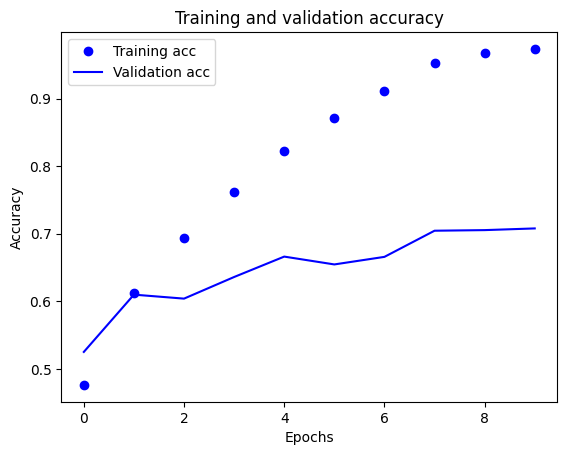

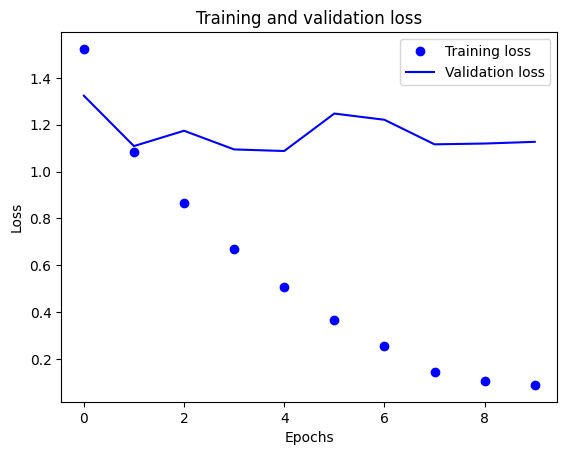

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'bo', label='Training acc')
plt.plot(history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ModelS_SGDOptimizer_Executado.ipynb-5

Aqui avaliamos o desempenho do modelo treinado nos conjuntos de teste e validação.

O primeiro bloco de código avalia o modelo no conjunto de validação "validation_dataset" e imprime a perda e a precisão.

O segundo bloco de código avalia o modelo no conjunto de teste "test_dataset" e imprime a perda e a precisão.


In [10]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('Validation Accuracy:', val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.6692 - loss: 1.0758
Validation Accuracy: 0.6661999821662903


In [11]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Loss: {loss}, Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.6583 - loss: 1.0930
Loss: 1.0986255407333374, Accuracy: 0.654699981212616


# ModelS_AdamOptimizer_Executado.ipynb-7

Avalia.se o desempenho do modelo treinado e visualizando os resultados.

O código começa por importar as bibliotecas necessárias e definindo uma função "evaluate_model" que recebe um modelo e um conjunto de dados, faz previsões para todas as imagens no conjunto de dados e retorna os rótulos verdadeiros e previstos.

Em seguida, ele usa a função "evaluate_model" para obter os rótulos verdadeiros e previstos para o conjunto de teste "test_dataset".

O código então calcula a matriz de confusão e a visualiza usando um mapa de calor.

Finalmente, imprime-se um relatório de classificação e visualiza-se a precisão, a revocação e o F1-score para cada classe.

# Análise dos Resultados de Classificação

A tabela apresentada resume o desempenho de um modelo de classificação testado num conjunto de dados com 10.000 instâncias, distribuídas equitativamente por 10 classes (de 0 a 9). A análise incide sobre as métricas de precisão, recall, pontuação F1 para cada classe, e a precisão geral do modelo.

Precisão:
A precisão mede a proporção de identificações positivas que foram corretamente classificadas. A classe 8 apresentou a maior precisão (0.82), indicando que o modelo foi muito eficaz ao identificar corretamente as instâncias desta classe. Por outro lado, a classe 3 teve a menor precisão (0.45), sugerindo uma maior quantidade de falsos positivos para esta classe.

Recall:
O recall avalia a proporção de positivos reais que foram corretamente identificados. A classe 6 teve o maior recall (0.82), mostrando que o modelo foi capaz de capturar a maioria das instâncias desta classe corretamente. A classe 5, com o menor recall (0.52), indica que muitas instâncias desta classe foram não identificadas pelo modelo.

Pontuação F1:
A pontuação F1 é a média harmônica da precisão e do recall, fornecendo um equilíbrio entre estas duas métricas. A classe 1 teve a maior pontuação F1 (0.78), demonstrando um bom equilíbrio entre precisão e recall. A classe 3, com a menor pontuação F1 (0.47), reflete tanto a baixa precisão quanto o baixo recall.

Suporte:
O suporte indica o número de ocorrências reais de cada classe no conjunto de teste, sendo igualmente distribuído com 1000 instâncias por classe.

Análise Geral:
O modelo alcançou uma precisão geral (accuracy) de 0.65, o que significa que 65% das previsões foram corretas. As métricas de média macro e média ponderada são ambas 0.65, indicando um desempenho equilibrado entre todas as classes.

Conclusão:
Embora o modelo mostre um desempenho razoável em algumas classes, há espaço para melhorias, especialmente nas classes com menor precisão e recall. Estratégias como ajuste de parâmetros, aumento de dados ou técnicas de balanceamento de classes podem ser exploradas para melhorar o desempenho do modelo nas classes com resultados mais baixos.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━

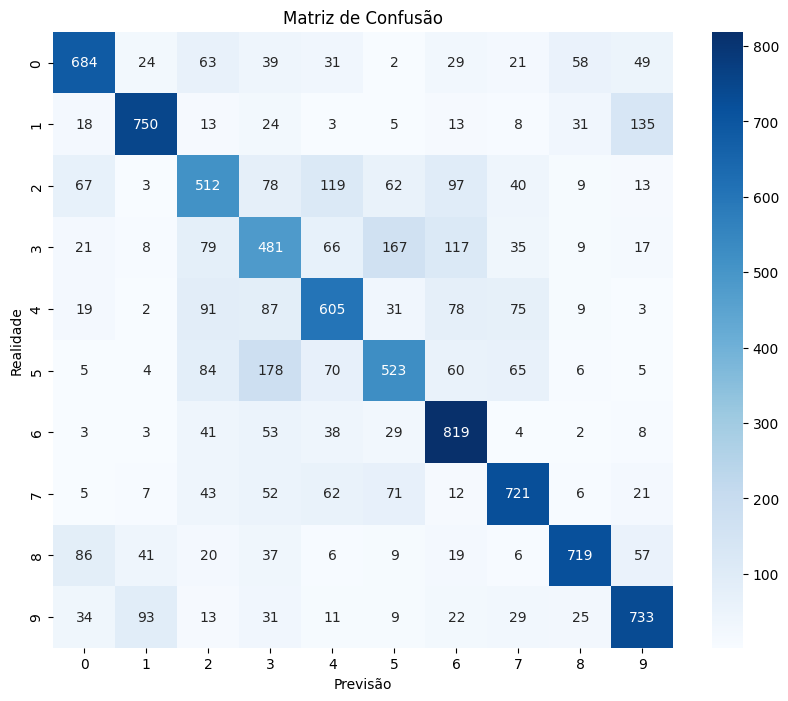

              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1000
           1       0.80      0.75      0.78      1000
           2       0.53      0.51      0.52      1000
           3       0.45      0.48      0.47      1000
           4       0.60      0.60      0.60      1000
           5       0.58      0.52      0.55      1000
           6       0.65      0.82      0.72      1000
           7       0.72      0.72      0.72      1000
           8       0.82      0.72      0.77      1000
           9       0.70      0.73      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



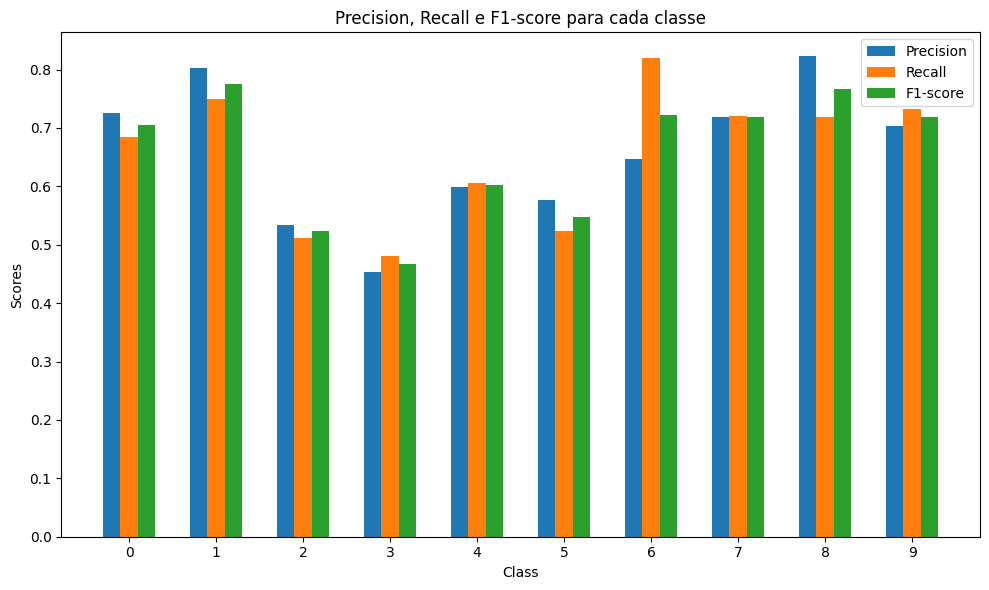

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate the model and get true and predicted labels
def evaluate_model(model, dataset):
    all_labels = []
    all_predictions = []

    for images, labels in dataset:
        predictions = model.predict(images)
        predicted_labels = np.argmax(predictions, axis=1)
        true_labels = labels.numpy()  # Convert to numpy array if not already

        all_labels.extend(true_labels)
        all_predictions.extend(predicted_labels)

    return np.array(all_labels), np.array(all_predictions)

# Get true and predicted labels for the test dataset
true_labels, predicted_labels = evaluate_model(model, test_dataset)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Realidade')
plt.show()

# Print classification report
class_names = [str(i) for i in range(10)]  # Define class names based on your dataset
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Extract precision, recall, and F1-score for each class from classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)

metrics = {'precision': [], 'recall': [], 'f1-score': []}
for cls in class_names:
    metrics['precision'].append(report[cls]['precision'])
    metrics['recall'].append(report[cls]['recall'])
    metrics['f1-score'].append(report[cls]['f1-score'])

# Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(class_names))

plt.bar(index, metrics['precision'], bar_width, label='Precision')
plt.bar(index + bar_width, metrics['recall'], bar_width, label='Recall')
plt.bar(index + 2*bar_width, metrics['f1-score'], bar_width, label='F1-score')

plt.xlabel('Class')
plt.ylabel('Scores')
plt.title('Precision, Recall e F1-score para cada classe')
plt.xticks(index + bar_width, class_names)
plt.legend()

plt.tight_layout()
plt.show()